## Data : Climate Data Daily IDN
* 2010년부터 2020년까지 인도네시아 지역 일일 기후 데이터
* Data From : https://www.kaggle.com/datasets/greegtitan/indonesia-climate

### 1. 데이터 불러오기
* 기본 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cm = pd.read_csv('C:/Users/User/Desktop/Climate Data Daily IDN/climate_data.csv')
cm_detail = pd.read_csv('C:/Users/User/Desktop/Climate Data Daily IDN/station_detail.csv')

* 데이터 살펴보기

In [3]:
cm.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [5]:
cm_detail.head()

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1


<칼럼 설명>  
climate_data.csv
* date : 날짜
* Tn : 최저기온(°C)
* TX : 최고기온(°C) 
* Tavg : 평균온도(°C)
* RH_avg : 평균 습도(%)
* RR : 강우량(mm)
* ss : 일조 시간(hour)
* ff_x : 최대 풍속(m/s)
* ddd_x : 최대 풍속 방향(°)
* ff_avg : 평균 풍속(m/s)
* ddd_car : 바람 방향(°)
* station_id : 거리 코드

station_detail.csv
* station_id : 거리 코드
* station_name : 거리명
* region_name : 지역명
* latitude : 위도
* longitude : 경도
* region_id : 지역 코드
* province_id : 지방 코드

## 2. 데이터 전처리

* 날짜 데이터 변환

In [3]:
cm['date'] = cm['date'].str[6:] + "-" + cm['date'].str[3:5] + "-"+ cm['date'].str[0:2]
cm['date'].head()

0    2010-01-01
1    2010-01-02
2    2010-01-03
3    2010-01-04
4    2010-01-05
Name: date, dtype: object

In [4]:
cm['date'] = pd.to_datetime(cm['date'])

* 데이터 병합

In [5]:
cm = pd.merge(cm,cm_detail,how = 'inner')
cm.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


* 데이터 결측치 확인

In [18]:
cm.isnull().sum()

date                 0
Tn               23383
Tx               37736
Tavg             45105
RH_avg           48182
RR              125384
ss               43721
ff_x             10214
ddd_x            13128
ff_avg           10127
ddd_car          13739
station_id           0
station_name         0
region_name          0
latitude             0
longitude            0
region_id            0
province_id          0
dtype: int64

* 데이터의 결측치 대체값 찾기  

ddd_car(바람 방향) 범주형 변수임으로 평균값을 찾기 어려움으로 컬럼을 삭제한다.

In [11]:
cm = cm.drop(columns=['ddd_car'])

In [ ]:
# running time(153m22.2s)
for i in range(0,len(cm)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm.loc[[i]] = cm[(cm['date'] == cm.iloc[i]['date'])&(cm['latitude'] >= cm.iloc[i]['latitude'] - 0.5)&(cm['latitude'] <= cm.iloc[i]['latitude'] + 0.5)].fillna({j:cm[(cm['date'] == cm.iloc[i]['date'])&(cm['latitude'] >= cm.iloc[i]['latitude'] - 0.5)&(cm['latitude'] <= cm.iloc[i]['latitude'] + 0.5)][j].mean()})

cm_null_col은 i번째의 결측 컬럼을 추출한다.  
그 다음으로 위도가 ±0.5인 지역의 평균 값을 결측치에 대입한다.

In [ ]:
cm.to_csv('climate_re.csv')

In [ ]:
cm_re = pd.read_csv('C:/Users/User/Desktop/Climate Data Daily IDN/climate_re.csv')

In [21]:
cm_re.isnull().sum()

Unnamed: 0          0
date                0
Tn                 31
Tx                 52
Tavg               68
RH_avg             68
RR               1496
ss                103
ff_x                1
ddd_x               0
ff_avg             24
ddd_car         13739
station_id          0
station_name        0
region_name         0
latitude            0
longitude           0
region_id           0
province_id         0
dtype: int64

많이 줄었지만 위도주변 지역에서 결측치를 잡을 수 없어서  
경도 ±0.5지역의 평균 값을 넣는다

In [ ]:
# running time(156m1.1s)
for i in range(0,len(cm_re)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re.loc[[i]] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['longitude'] >= cm_re.iloc[i]['longitude'] - 0.5)&(cm_re['longitude'] <= cm_re.iloc[i]['longitude'] + 0.5)].fillna({j:cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['longitude'] >= cm_re.iloc[i]['longitude'] - 0.5)&(cm_re['longitude'] <= cm_re.iloc[i]['longitude'] + 0.5)][j].mean()})

In [ ]:
cm_re.to_csv('climate_re_re.csv')

In [22]:
cm_re_re = pd.read_csv('C:/Users/User/Desktop/Climate Data Daily IDN/climate_re_re.csv')

In [23]:
cm_re_re.isnull().sum()

Unnamed: 0          0
date                0
Tn                  4
Tx                  2
Tavg                2
RH_avg              2
RR                320
ss                  9
ff_x                0
ddd_x               0
ff_avg              0
ddd_car         13739
station_id          0
station_name        0
region_name         0
latitude            0
longitude           0
region_id           0
province_id         0
dtype: int64

Tn(최저 기온),Tx(최고 기온),RH_avg(평균 습도)값은 지역을 ±1.0으로 더 넓혀서 결측치를 찾고,  
Tavg(평균 기온)은 직접 행에서 최저,최고기온에 평균 값으로 대체한다.  
그리고 RR(강우량),ss(일조량)값은 주변 값으로 대체 불가능함으로 결측치행은 제거한다.

In [95]:
cm = pd.read_csv('C:/Users/User/Desktop/Climate Data Daily IDN/climate_re_re_re.csv')

In [26]:
cm.isnull().sum()

Unnamed: 0      0
date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
station_id      0
station_name    0
region_name     0
latitude        0
longitude       0
region_id       0
province_id     0
dtype: int64

Unnamed: 0컬럼은 필요없으므로 삭제한다.

In [96]:
cm = cm.drop(columns=['Unnamed: 0'])

In [89]:
cm.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,6.5,157.5,2.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


데이터 전체 크기 확인

In [34]:
cm.shape

(589067, 17)

## 3. 시계열 데이터 예측

* Kota Sabang지역 Tavg(평균 온도) 예측

In [97]:
cm = cm[cm['region_name'] == 'Kota Sabang']

In [91]:
cm.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,6.5,157.5,2.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


In [98]:
cm['date'] = pd.to_datetime(cm['date'])
cm.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,6.5,157.5,2.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


In [93]:
df = cm[['Tavg']]

<AxesSubplot:xlabel='date'>

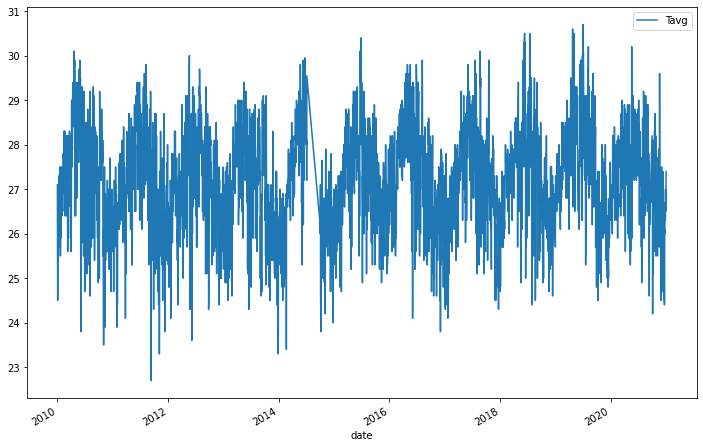

In [54]:
df.plot(figsize = (12,8))

### 3-1 ARIMA모델을 사용한 예측

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

#### train, test 데이터셋 분리

In [99]:
df = cm[['date','Tavg']]

In [100]:
train = df.iloc[:-24]
test = df.iloc[-24:]

#### auto_arima 함수를 사용해서 최적의 모형을 탐색한다

In [40]:
model = auto_arima(train['Tavg'],trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9800.808, Time=5.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10989.288, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10428.520, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10009.345, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10987.289, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9800.408, Time=3.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9886.595, Time=1.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9833.533, Time=1.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9800.529, Time=4.55 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9848.688, Time=1.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9809.055, Time=1.94 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9804.379, Time=4.57 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=9798.414, Time=0.98 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=9884.598, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0]      

auto_arima를 사용해서 최적의 모델은 ARIMA(1,1,2)모델로 나왔다.

In [19]:
model.fit(train)
prediction = model.predict(24)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


model에 train 데이터셋을 넣어서 test 데이터셋 크기와 같은  
24일 후를 예측한다.

시각화를 해서 예측데이터와 test데이터를 비교해보면

<AxesSubplot:>

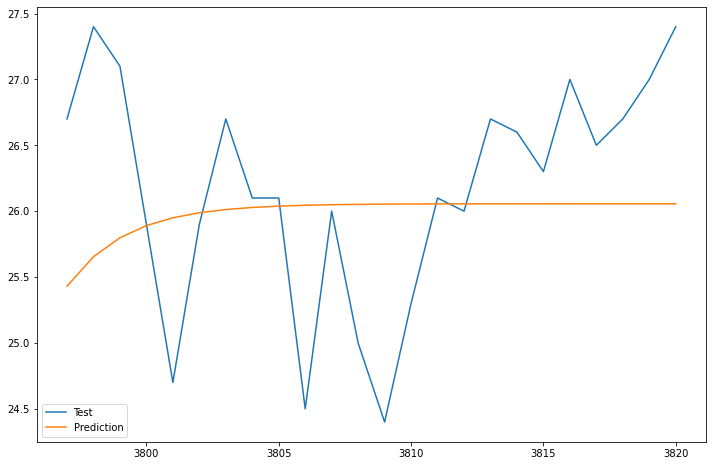

In [53]:
ax = test.plot(y = 'Tavg',label = 'Test',figsize = (12,8),legend = True)
prediction.plot(label = 'Prediction',legend = True)

예측 결과가 일직선으로 예측 되었다   
왜 auto_arima는 이런 모델을 예측했을까?

데이터에 특정한 주기나 추세가 없기때문에 모형을 최적화하는   
과정에서 자기상관(AR)과 이동평균(MA)를 찾기 어려웠기 때문이다.  
결과적으로 데이터에서 어떠한 구조를 보기 어렵기 때문에   
가장 마지막 관측치가 가장 좋은 예측치라고 말하고 있는 것이다.

하지만 우리가 원하는 예측은 이런 예측이 아니기 때문에   
다른 방법인 한번에 test 데이터셋 전체를 예측하는 것이 아닌  
1일을 예측하고 모델을 업데이트하는 방법을 사용할것이다.  

In [59]:
pred_y = []
for i in test['Tavg'] : 
    pred = model.predict(1)
    pred_y.append(pred.tolist()[0])
    model.update(i)

In [63]:
prediction_1 = pd.DataFrame({"test" : test['Tavg'],"prediction" : pred_y})
prediction_1.head()

,test,prediction
3797,26.7,26.789526
3798,27.4,26.592896
3799,27.1,26.826327
3800,25.9,26.793390
3801,24.7,26.311720


<AxesSubplot:>

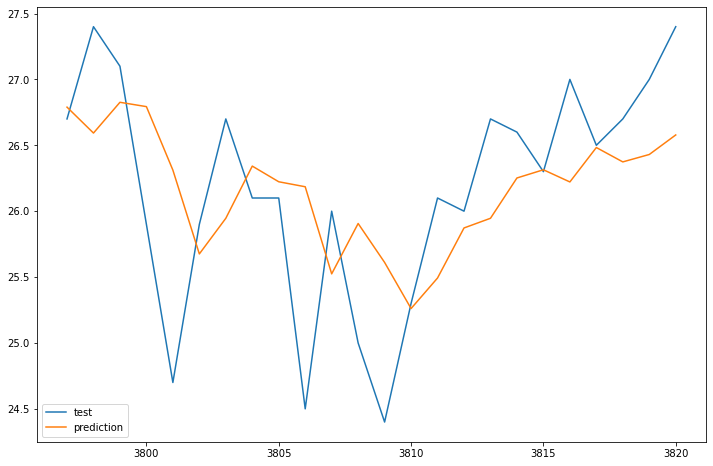

In [66]:
prediction_1.plot(figsize = (12,8))

#### 모델 검증

In [67]:
from sklearn.metrics import mean_squared_error

In [71]:
(mean_squared_error(prediction_1['test'],prediction_1['prediction']))**0.5*100/prediction_1['test'].mean()

2.808480224686483

예측결과가 일직선인 모델이 아닌  
오차값이 ±2.8%인 예측을 하였다

이 모델을 바탕으로 앞으로 일어날 미래에 대한   
예측을 진행해 보자

#### 불확실한 미래에 대한 예측(30일)

In [72]:
model.fit(df['Tavg'])

array([26.57849909])

In [101]:
pred_real = []
for i in range(30): 
    pred_re = model.predict(1)
    pred_real.append(pred_re.tolist()[0])
    df['Tavg'].loc[len(df)] = pred_re.tolist()[0]
    model.update(pred_re.tolist()[0])
    i += 1

In [80]:
prediction_re = pd.DataFrame({"prediction" : pred_real})
prediction_re.head()

,prediction
0,26.798921
1,26.641407
2,26.540517
3,26.476348
4,26.435228


<AxesSubplot:>

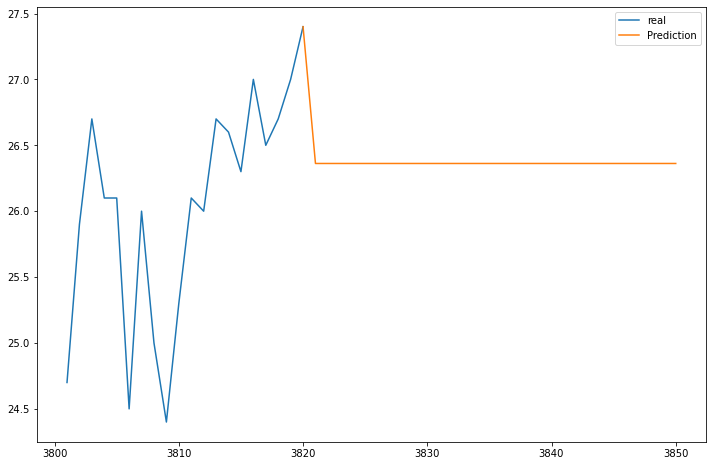

In [116]:
ax = df['Tavg'].iloc[-50:-30].plot(label = 'real',figsize = (12,8),legend = True)
df['Tavg'].iloc[-31:].plot(label = 'Prediction',legend = True,ax =ax)

불확실한 미래에 대해서는 이전에 train 데이터셋으로 test 데이터셋을  
예측했을 때와 같은 모습을 보여주고 있다.  
전에 train 데이터 셋으로 할 때는 하루 예측하고 다음날 데이터가 있기 때문에   
보다 정확한 예측이 가능했다.   
결론적으로 예측 결과과 조금 허무하다. 결국 1일전 데이터를 업데이트 해주면  
다음날의 예측값만 정확하게 예측을 진행할수 있다.  
ARIMA 모형은 추세와 계절성이 있을 때 보다정확한 예측이 가능할 것 같다.

### 3-2 Prophet을 이용한 예측

ARIMA모델에서 사용하던 train, test 데이터셋을 사용한다.

In [121]:
from prophet import Prophet

In [123]:
train.columns = ['ds','y']

In [124]:
p = Prophet()
p.fit(train)
future = p.make_future_dataframe(periods=24,freq='D')
forecast = p.predict(future)

12:57:17 - cmdstanpy - INFO - Chain [1] start processing
12:57:18 - cmdstanpy - INFO - Chain [1] done processing


In [134]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,27.390079,25.259112,27.718564,27.390079,27.390079,-0.885234,-0.885234,-0.885234,0.021097,0.021097,0.021097,-0.906331,-0.906331,-0.906331,0.0,0.0,0.0,26.504846
1,2010-01-02,27.389262,25.314545,27.702471,27.389262,27.389262,-0.894274,-0.894274,-0.894274,-0.001126,-0.001126,-0.001126,-0.893148,-0.893148,-0.893148,0.0,0.0,0.0,26.494988
2,2010-01-03,27.388444,25.333933,27.670799,27.388444,27.388444,-0.868352,-0.868352,-0.868352,0.012980,0.012980,0.012980,-0.881332,-0.881332,-0.881332,0.0,0.0,0.0,26.520093
3,2010-01-04,27.387627,25.273006,27.778130,27.387627,27.387627,-0.874000,-0.874000,-0.874000,-0.003140,-0.003140,-0.003140,-0.870861,-0.870861,-0.870861,0.0,0.0,0.0,26.513626
4,2010-01-05,27.386809,25.245068,27.713173,27.386809,27.386809,-0.892844,-0.892844,-0.892844,-0.031178,-0.031178,-0.031178,-0.861666,-0.861666,-0.861666,0.0,0.0,0.0,26.493965


<AxesSubplot:xlabel='date'>

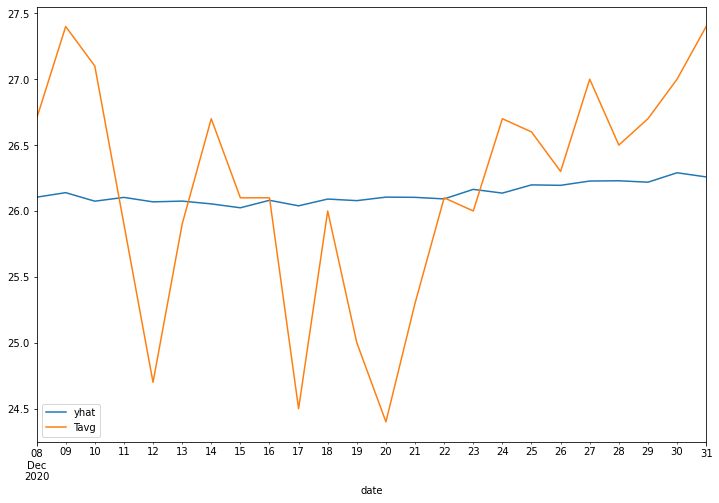

In [136]:
ax = forecast.iloc[-24:].plot(x = 'ds',y = 'yhat',legend = True,figsize = (12,8))
test.plot(x ='date', y = 'Tavg',legend = True,ax =ax )

Prophet도 ARIMA모델과 같은 모양을 예측을 하고있다.  
다음번에 더 좋은 데이터 셋으로 예측을 해봐야겠다.